 # Iris Clustering Assessment 

### 1. Loading and Preprocessing 

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


In [18]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [19]:
print("Iris dataset sample:")
display(iris_df.head())

Iris dataset sample:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# Preprocessing: no species column used (clustering is unsupervised)
print("\nNo species column used as this is an unsupervised clustering task.")



No species column used as this is an unsupervised clustering task.


In [25]:
# Standardizing the data
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

## 2.Clustering Algorithm Implementation 

### A) KMeans Clustering
#### Description:
"""
KMeans clustering is a partition-based clustering algorithm. It partitions the dataset into K distinct, non-overlapping clusters. 
It works by randomly initializing K centroids, assigning each point to the nearest centroid, and then updating the centroids based 
on the mean of the assigned points. This process is repeated until convergence.

KMeans is suitable for the Iris dataset because:
- It works well with spherical clusters of similar size.
- Iris has clear structure and separable features that suit KMeans.
"""

In [29]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\athir\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\athir\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\athir\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\athir\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

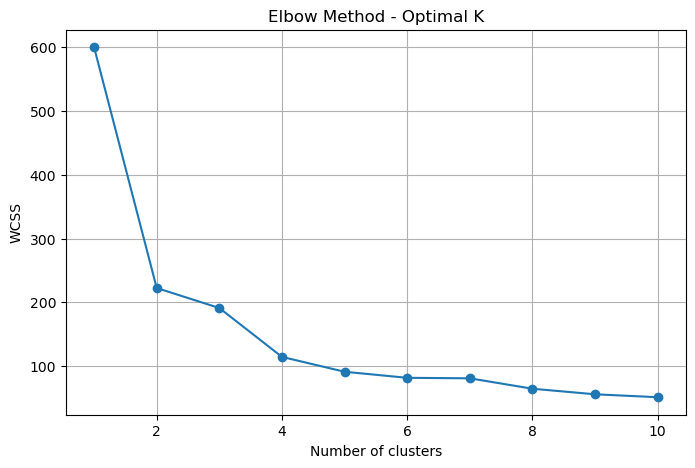

In [35]:
# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()

In [37]:
# From the Elbow Method, optimal K is 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(iris_scaled)

C:\Users\athir\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
# Visualizing the clusters using PCA (2D)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

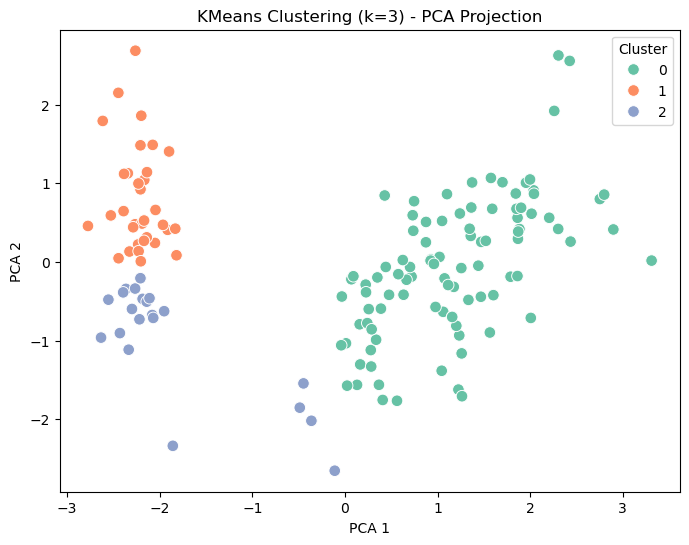

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=kmeans_labels, palette="Set2", s=70)
plt.title("KMeans Clustering (k=3) - PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()


In [43]:
# Silhouette Score
silhouette_kmeans = silhouette_score(iris_scaled, kmeans_labels)
print(f"Silhouette Score for KMeans: {silhouette_kmeans:.3f}")


Silhouette Score for KMeans: 0.480


### 2. B) Hierarchical Clustering

#### Description

- Hierarchical clustering builds a tree-like structure called a **dendrogram** to represent data grouping.
- It is a connectivity-based clustering model that groups the data points
together that are close to each other based on the measure of similarity or
distance
- Two main types:
  1. **Agglomerative (bottom-up):** Each point starts as its own cluster and is merged step by step.
  2. **Divisive (top-down):** Starts with one cluster and splits recursively.

#### Suitability for Iris Dataset

- Does **not require predefining** the number of clusters.
- The **dendrogram helps visualize** cluster relationships and structure.


In [30]:
# Create linkage matrix for hierarchical clustering
linkage_matrix = linkage(iris_scaled, method='ward')


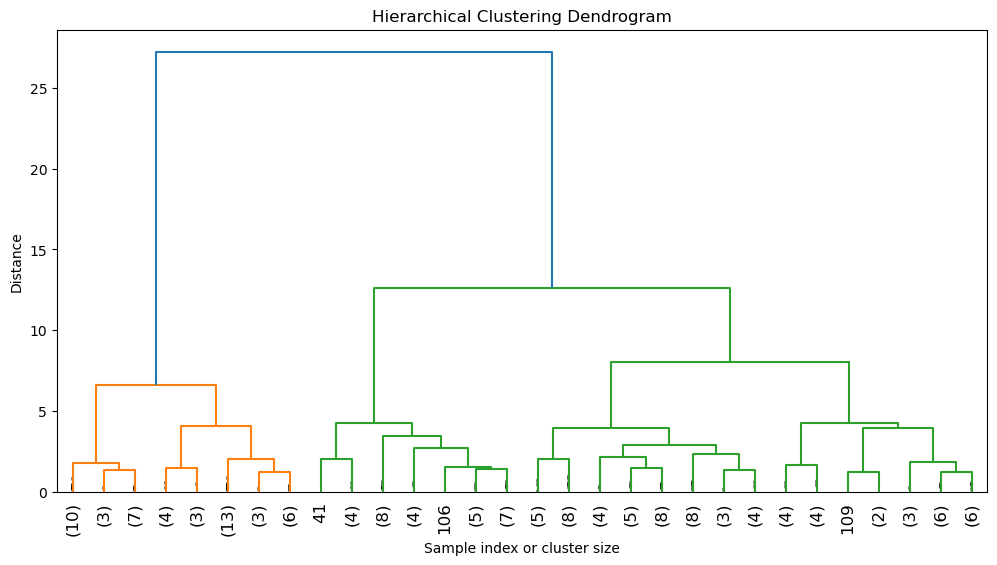

In [32]:
# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.show()

In [34]:
# Applying Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

hier_cluster = AgglomerativeClustering(n_clusters=3)
hier_labels = hier_cluster.fit_predict(iris_scaled)

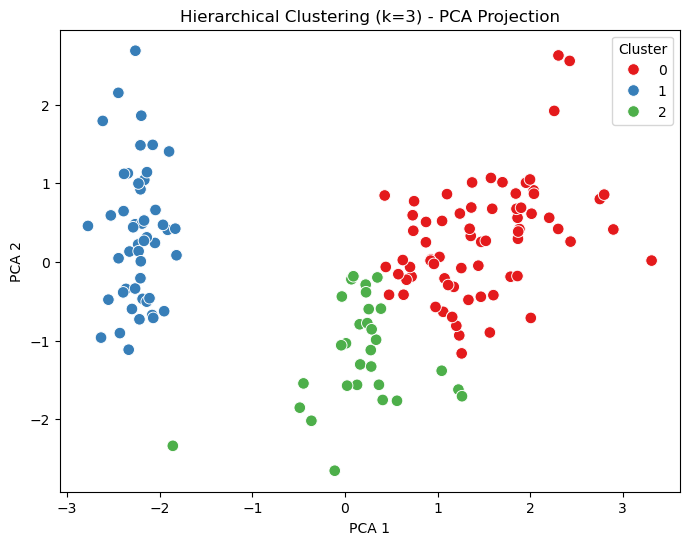

In [36]:
# Visualize using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=iris_pca[:, 0], y=iris_pca[:, 1], hue=hier_labels, palette="Set1", s=70)
plt.title("Hierarchical Clustering (k=3) - PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

In [38]:
# Silhouette Score
silhouette_hier = silhouette_score(iris_scaled, hier_labels)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hier:.3f}")

Silhouette Score for Hierarchical Clustering: 0.447
